In [65]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [66]:
df=pd.read_csv('/content/ToyotaCorolla.csv',encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,Silver,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,Blue,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,Black,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,Black,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,Blue,0,1300,3,4,5,69,1025,1,1,3,1,1,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,Grey,0,1300,3,4,5,69,1015,0,1,3,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,Blue,0,1300,3,4,5,69,1015,0,1,3,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,Grey,0,1300,3,4,5,69,1015,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [67]:
df.shape

(1436, 38)

In [68]:
df=df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [69]:
df.isnull().sum()#checking for null value

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [70]:
df.describe() #descriptive analysis

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [71]:
df.info() #check for data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [72]:
df1=df.rename({'Age_08_04':'AGE','cc':'CC','Quarterly_Tax':'QT'},axis=1)
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [73]:
df1.corr()

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
AGE,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


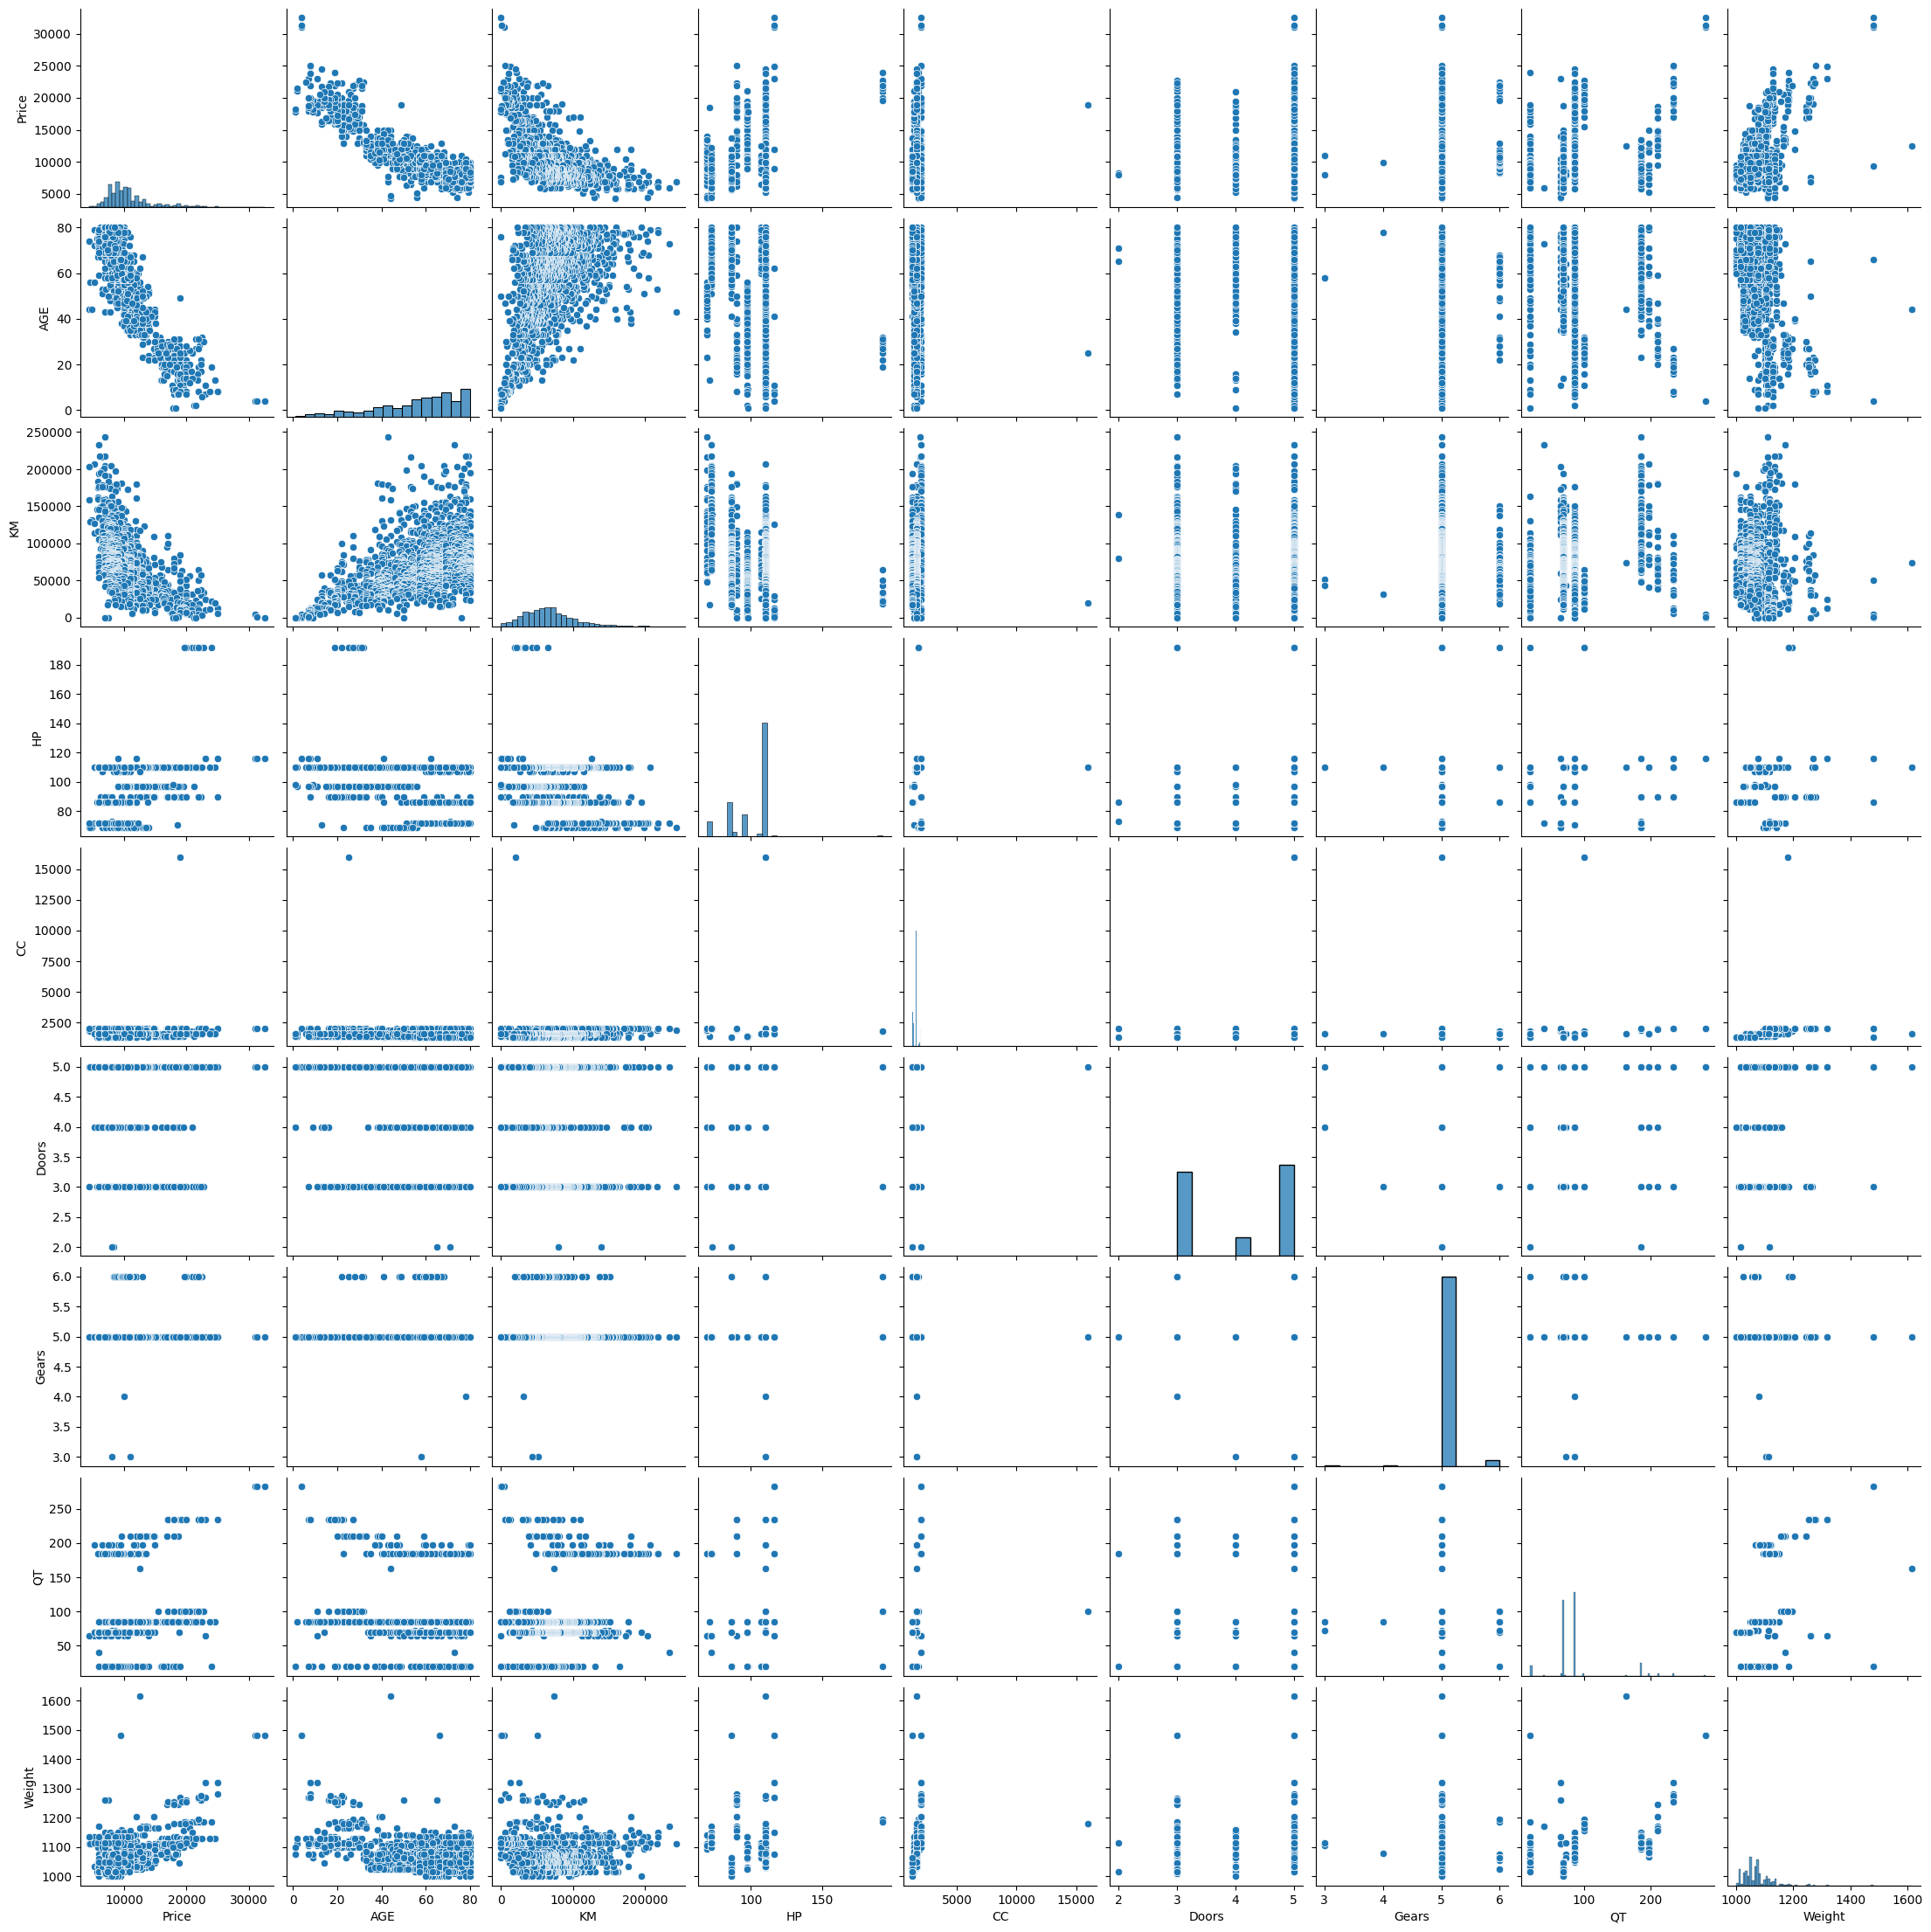

In [74]:
sns.pairplot(df1)

In [75]:
#checking for dupicate value
df1[df1.duplicated()]

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [78]:
df1=df1.drop_duplicates().reset_index(drop=True)
df1[df1.duplicated()]



,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight


In [81]:
model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        11:50:21   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
AGE         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:

print('PARAMETERS:\n',model.params,'\n')
print('T_VALUES:\n',model.tvalues,'\n')
print('p_values:\n',np.round(model.pvalues,5),)




PARAMETERS:
 Intercept   -5472.540368
AGE          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64 

T_VALUES:
 Intercept    -3.875273
AGE         -46.551876
KM          -16.552424
HP           11.209719
CC           -1.316436
Doors        -0.023012
Gears         3.034563
QT            2.944198
Weight       15.760663
dtype: float64 

p_values:
 Intercept    0.00011
AGE          0.00000
KM           0.00000
HP           0.00000
CC           0.18824
Doors        0.98164
Gears        0.00245
QT           0.00329
Weight       0.00000
dtype: float64


In [88]:
model.tvalues , np.round(model.pvalues,5)

(Intercept    -3.875273
 AGE         -46.551876
 KM          -16.552424
 HP           11.209719
 CC           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64,
 Intercept    0.00011
 AGE          0.00000
 KM           0.00000
 HP           0.00000
 CC           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64)

In [104]:
 model.rsquared,model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [110]:
# Build SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues
slr_cc=smf.ols('Price~CC',data=df1).fit()
slr_cc.tvalues,np.round(slr_cc.pvalues,5)

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    0.0
 CC           0.0
 dtype: float64)

In [112]:
slr_Doors=smf.ols('Price~Doors',data=df1).fit()
slr_Doors.tvalues,np.round(slr_Doors.pvalues,5)

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    0.0
 Doors        0.0
 dtype: float64)

In [117]:
#Model Validation Techniques
#Two Techniques: 1. Collinearity Check & 2. Residual Analysis
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_age=smf.ols('AGE~KM+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~AGE+HP+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~AGE+KM+CC+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~AGE+KM+HP+Doors+Gears+QT+Weight',data=df1).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~AGE+KM+HP+CC+Gears+QT+Weight',data=df1).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~AGE+KM+HP+CC+Doors+QT+Weight',data=df1).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~AGE+KM+HP+CC+Doors+Gears+Weight',data=df1).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~AGE+KM+HP+CC+Doors+Gears+QT',data=df1).fit().rsquared
vif_WT=1/(1-rsq_WT)

d1={'Variables':['AGE','KM','HP','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,AGE,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


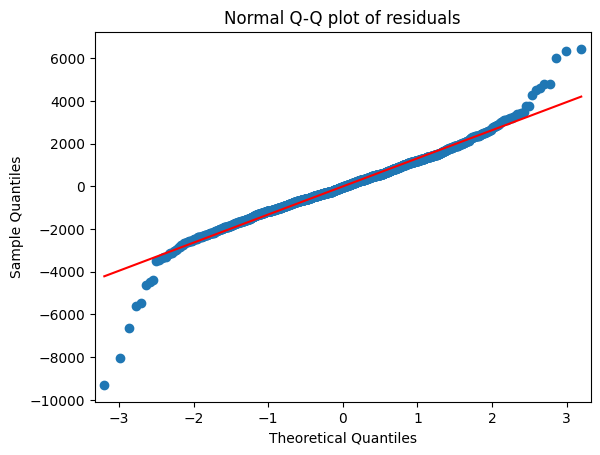

In [121]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='r') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [126]:
list(np.where(model.resid>6000))


[array([109, 146, 522])]

In [128]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

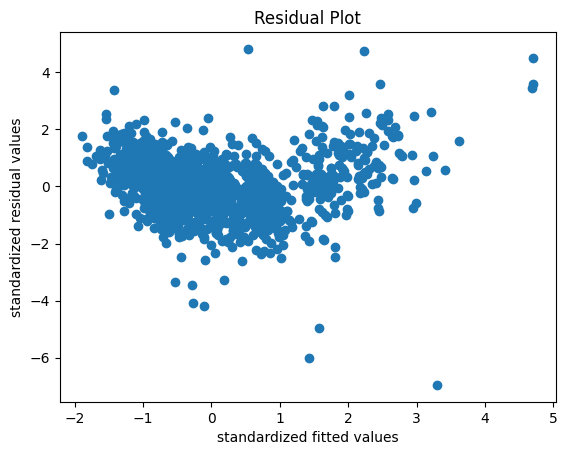

In [131]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

eval_env: 1


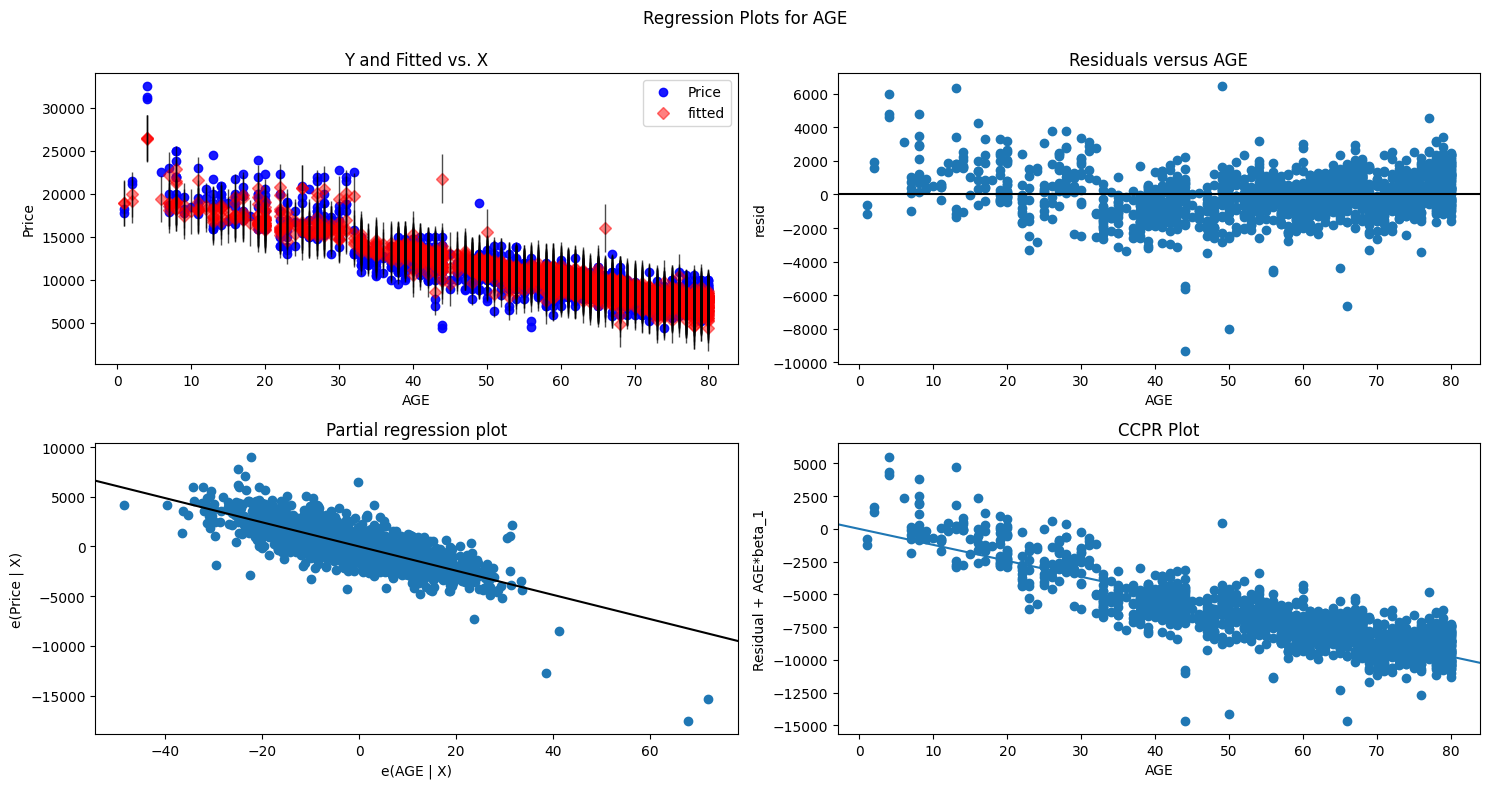

eval_env: 1


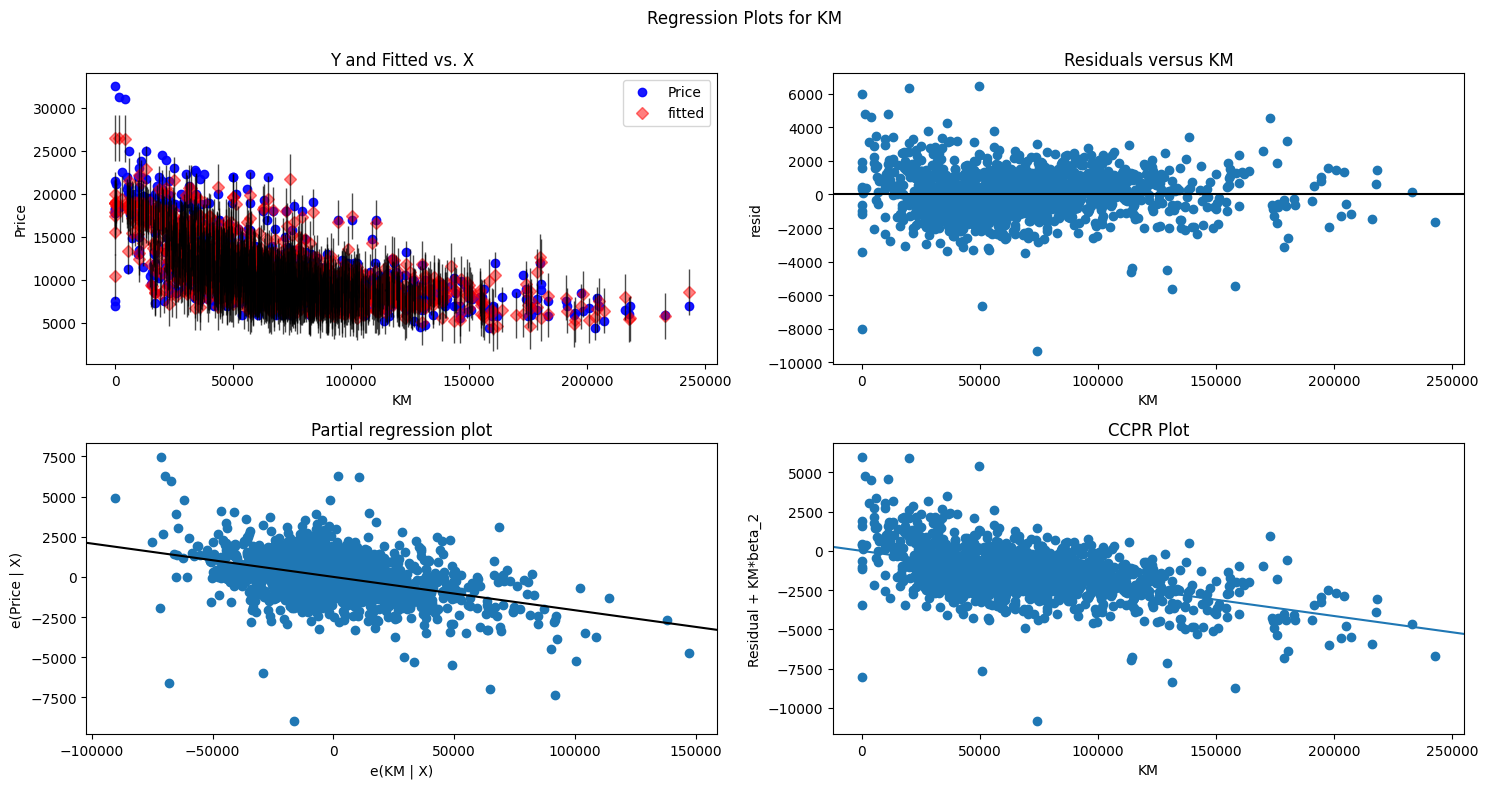

eval_env: 1


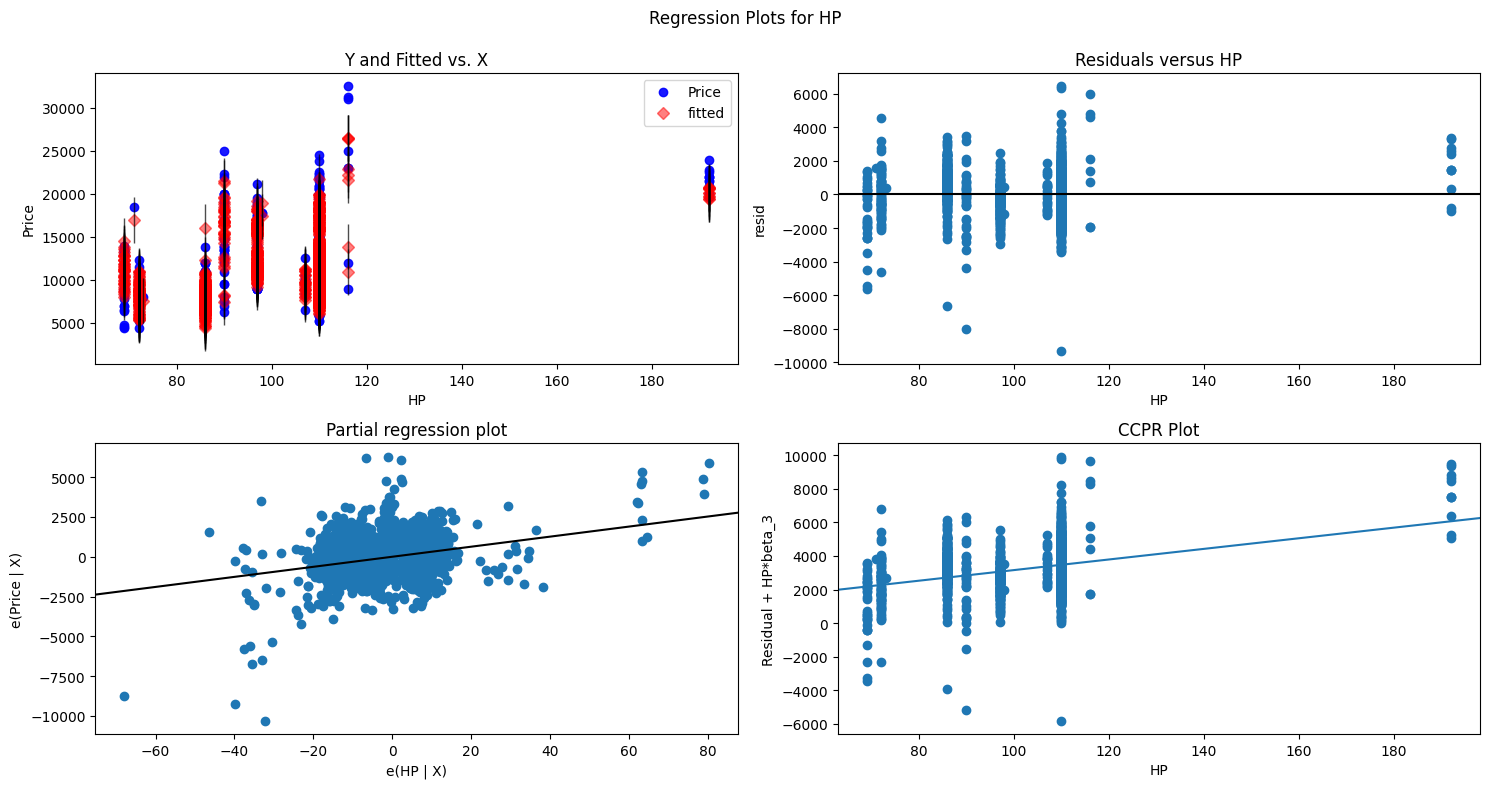

eval_env: 1


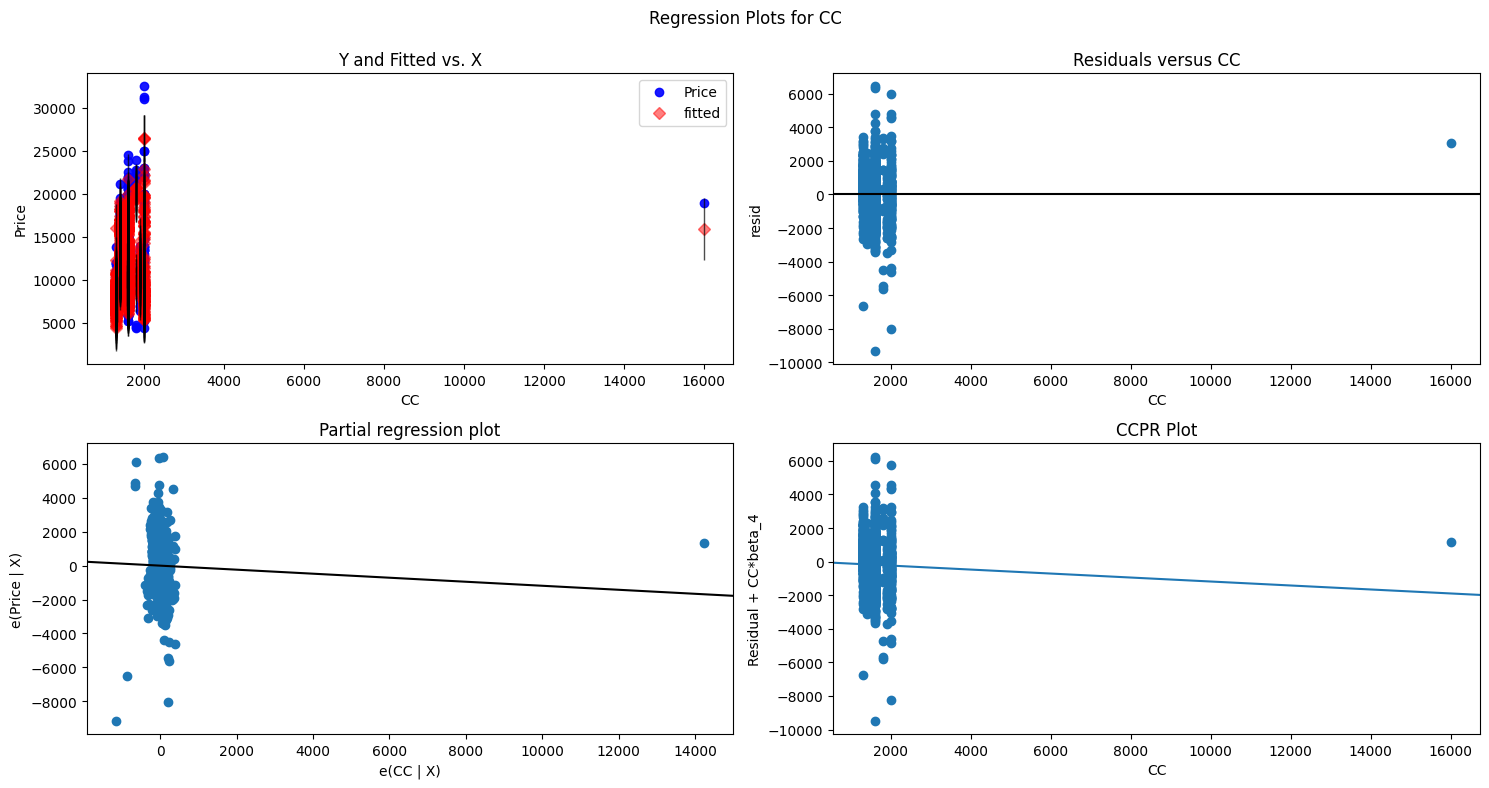

eval_env: 1


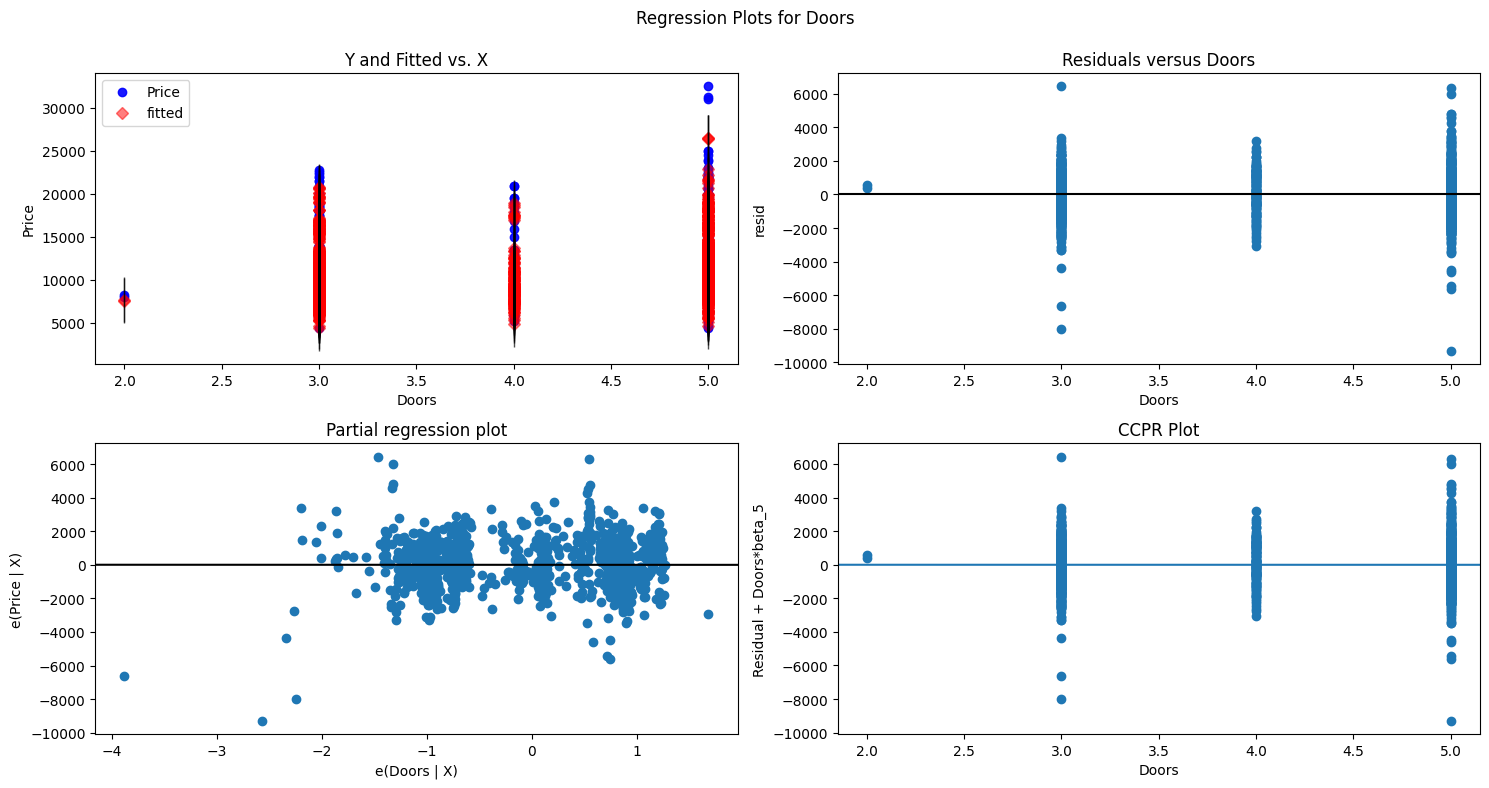

eval_env: 1


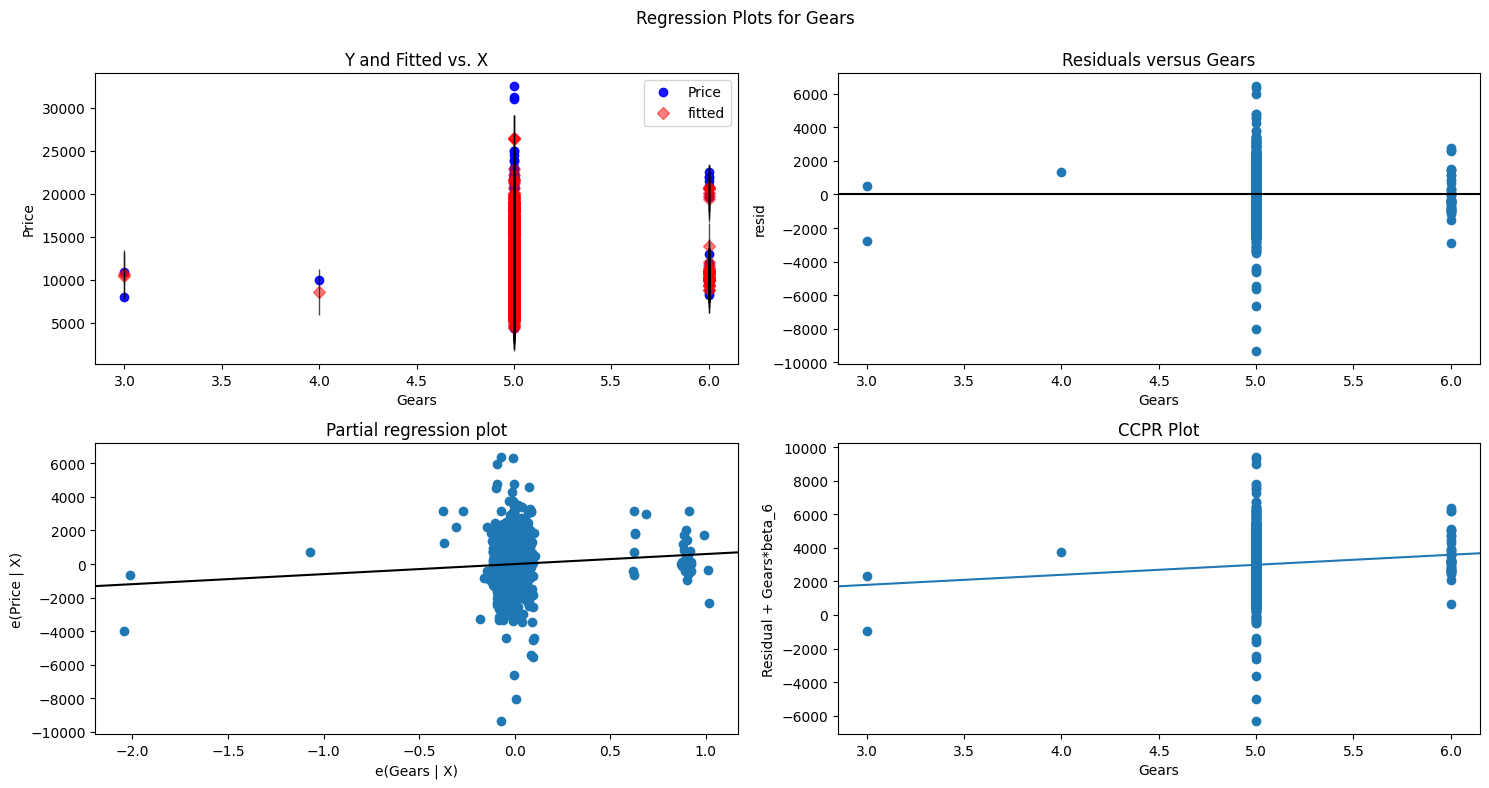

eval_env: 1


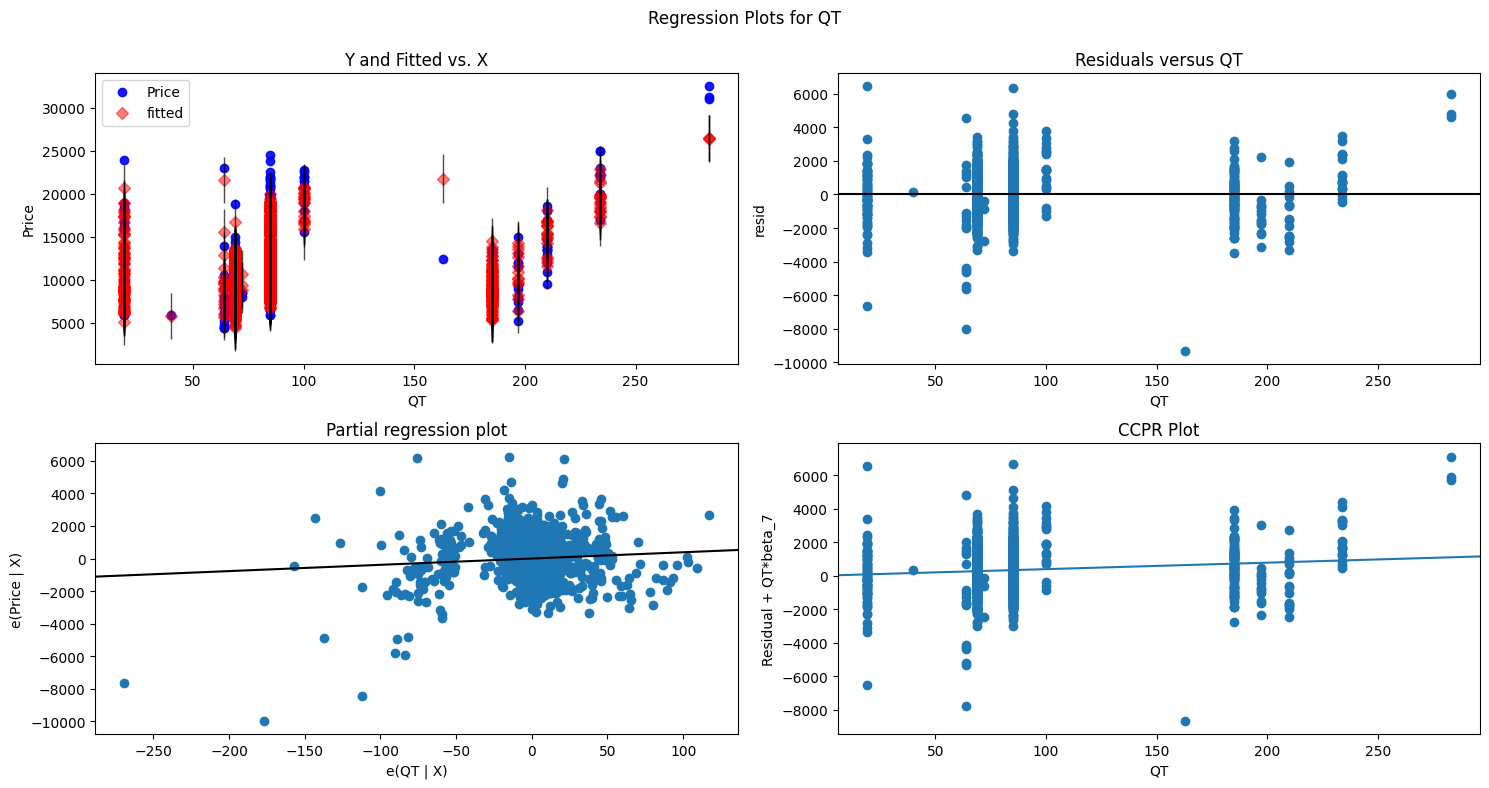

eval_env: 1


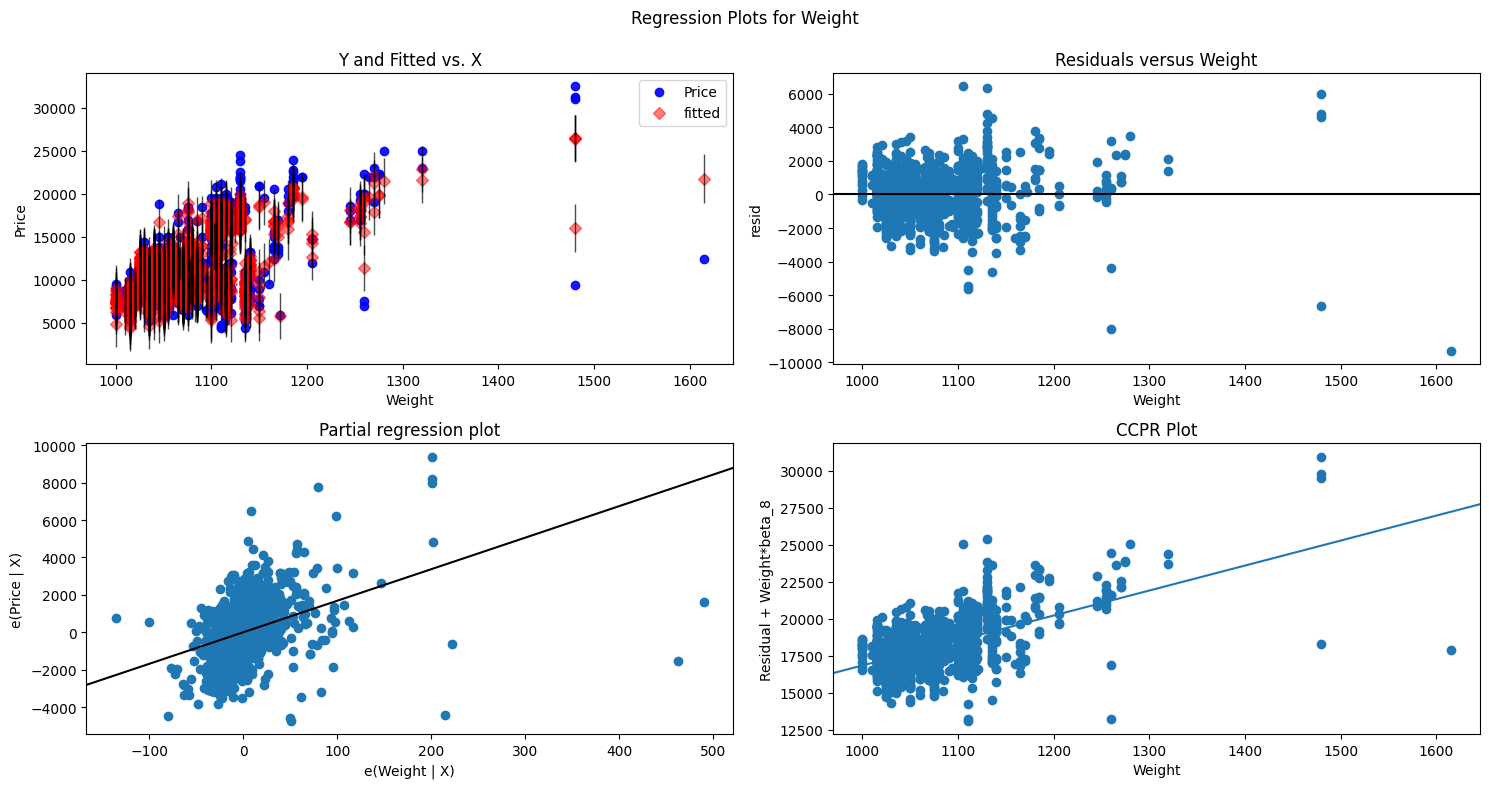

In [133]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AGE',fig=fig)
plt.show()

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [135]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Two Techniques : 1. Cook's Distance & 2. Leverage value

# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c


array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

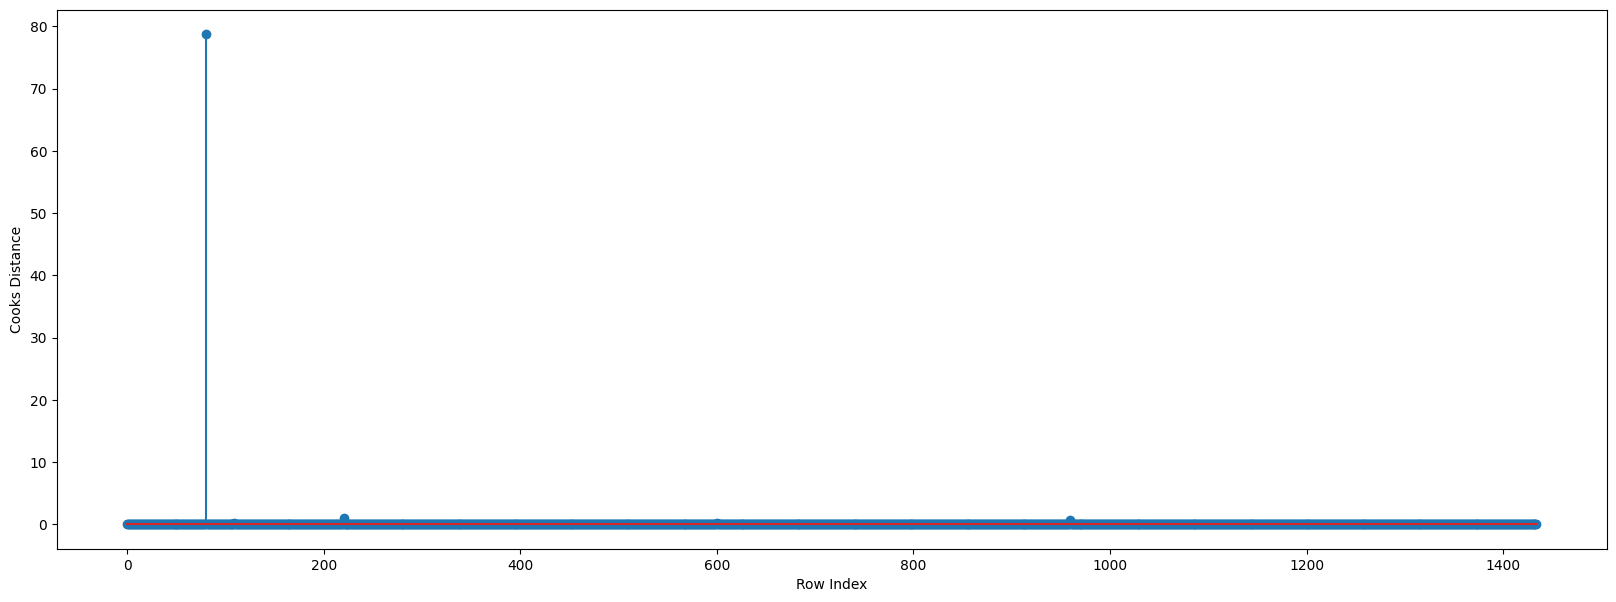

In [139]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [141]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582258932)

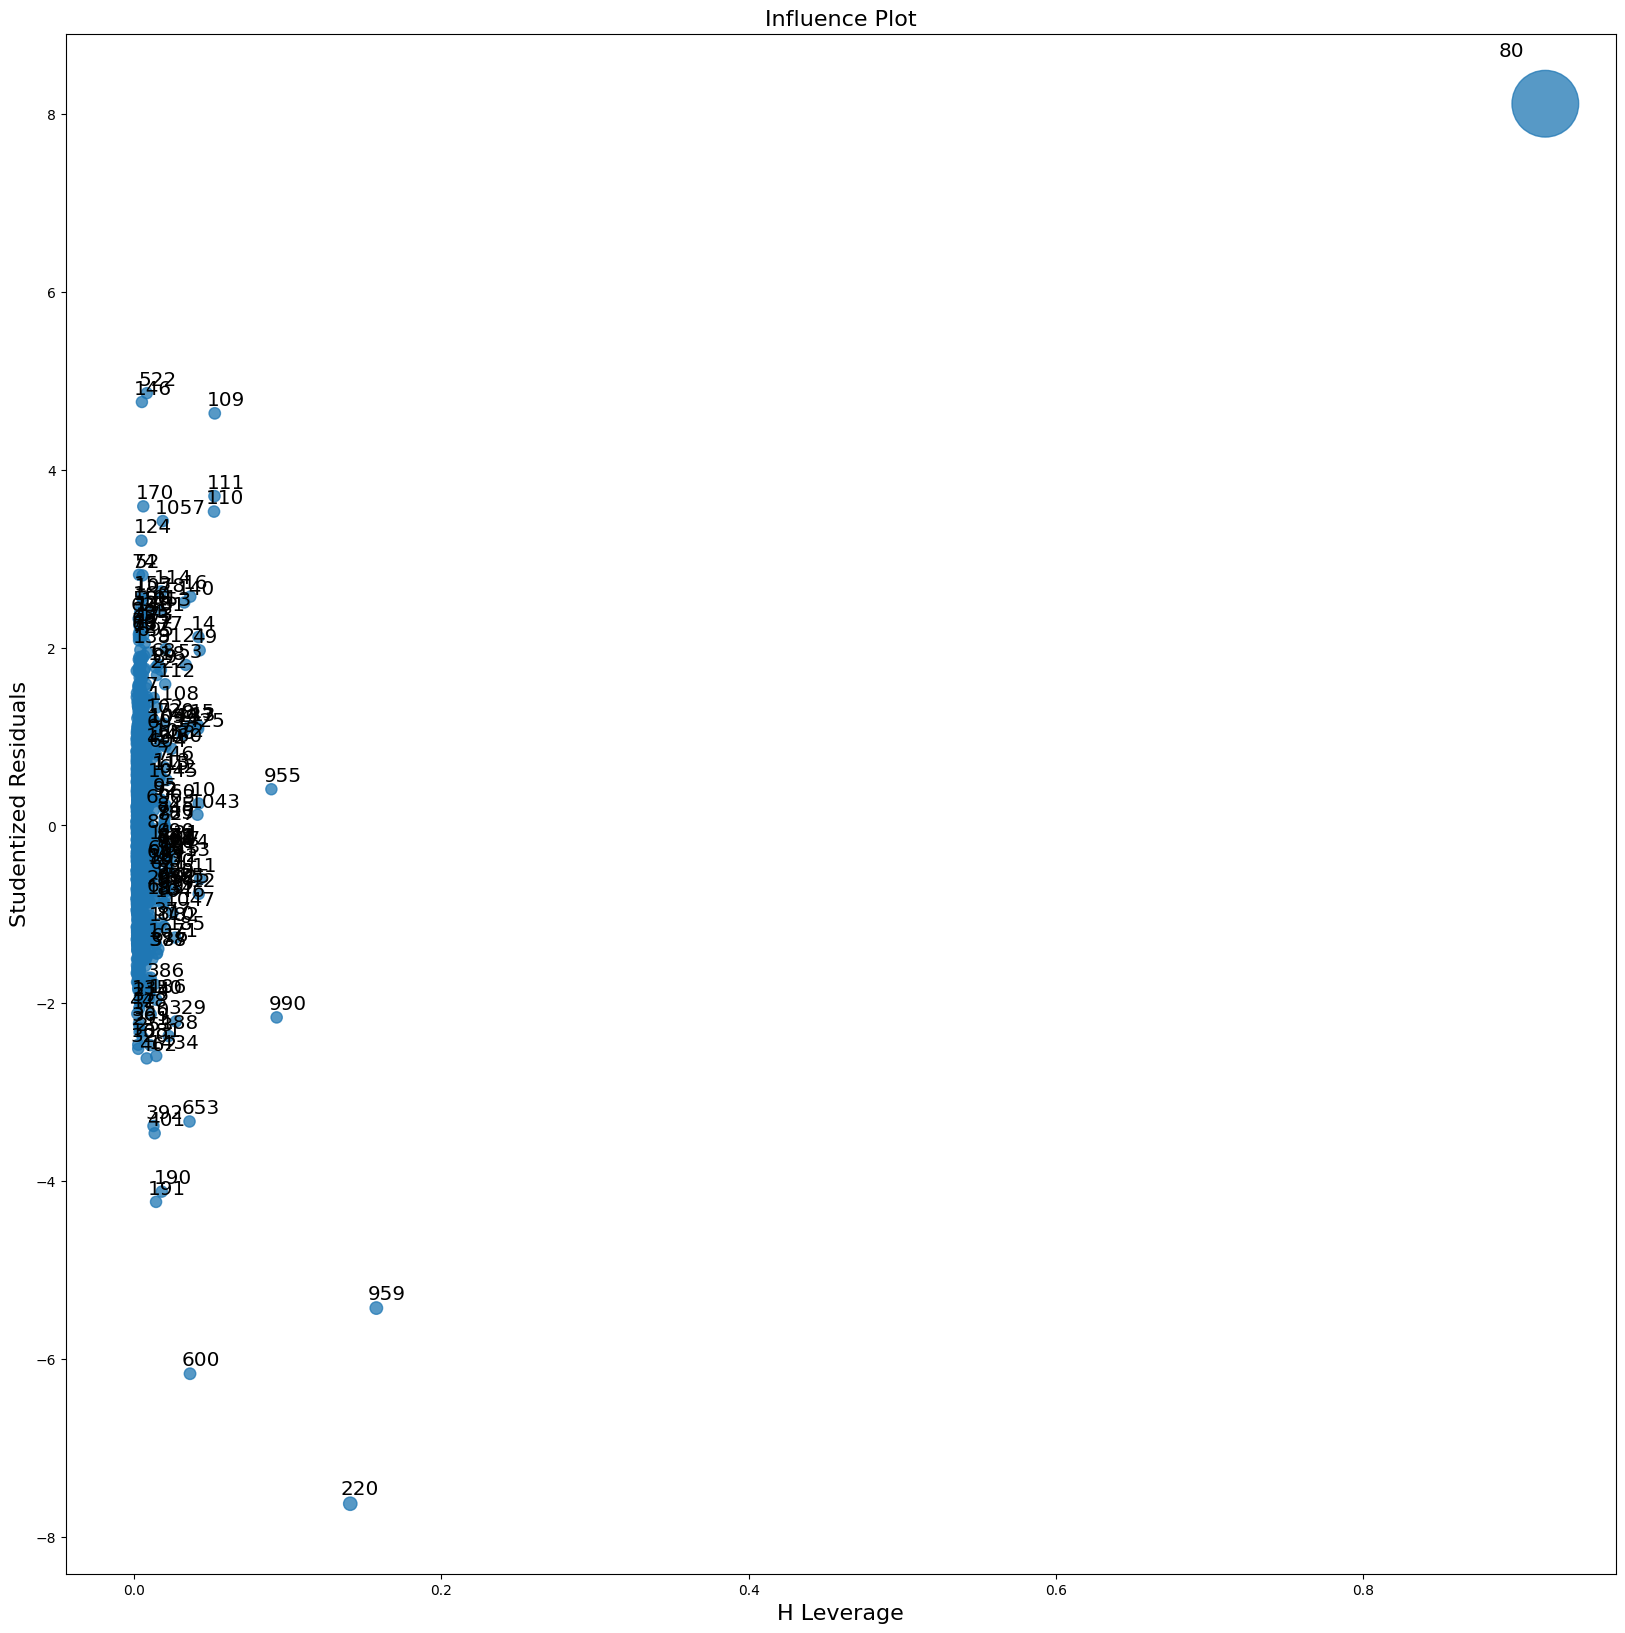

In [142]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [144]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=df1.shape[1]
n=df1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [147]:
df1[df1.index.isin([80])] 

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [149]:
df1_new=df1.copy()
df1_new

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [151]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df_new=df1_new.drop(df1_new.index[[80]],axis=0).reset_index(drop=True)
df_new

,Price,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [156]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+Weight',data=df_new).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df_new=df_new.drop(df_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df_new
    else:
        final_model=smf.ols('Price~AGE+KM+HP+CC+Doors+Gears+QT+Weight',data=df_new).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.888830069020742
Thus model accuracy is improved to 0.8890577556184879
Thus model accuracy is improved to 0.8898790181431516
Thus model accuracy is improved to 0.8905555862707121
Thus model accuracy is improved to 0.8905494548555106
Thus model accuracy is improved to 0.8907035715786529
Thus model accuracy is improved to 0.8909968812264217
Thus model accuracy is improved to 0.8912949497964373
Thus model accuracy is improved to 0.8918388895715855
Thus model accuracy is improved to 0.892670431541788
Thus model accuracy is improved to 0.8928840759989136
Thus model accuracy is improved to 0.8933496039941571
Thus model accuracy is improved to 0.8936856658122996
Thus model accuracy is improved to 0.8944751976424921
Thus model accuracy is improved to 0.893839548043574
Thus model accuracy is improved to 0.8931993880518596
Thus model accuracy is improved to 0.8925409392511808
Thus model accuracy is improved to 0.8933274017072571
Thus model accuracy is improved

In [158]:
final_model.rsquared # Model Accuracy is increased to 90.02%

0.9003762532318559

In [162]:
# say New data for prediction is
new_data=pd.DataFrame({'AGE':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,AGE,KM,HP,CC,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [164]:
final_model.predict(new_data)

0    14398.815471
dtype: float64

In [165]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(df_new)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64